In [1]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from scipy.signal import correlate

In [2]:
import sys
sys.path.append("../..")
import micromet
from micromet import bland_alt_plot,scatterplot_instrument_comparison

In [3]:
compare = pd.read_excel(r"G:\Shared drives\UGS_Flux\Data_Downloads\Desert_View_Myton\UT_Myton_LI720vsIRGASON.xlsx",
                        sheet_name='Compare',
                        index_col=0,
                        parse_dates=True,
                        na_values=['NAN']
                        )
compare = compare.replace(-9999,np.nan)
compare = compare.dropna()

0.8913980627852706


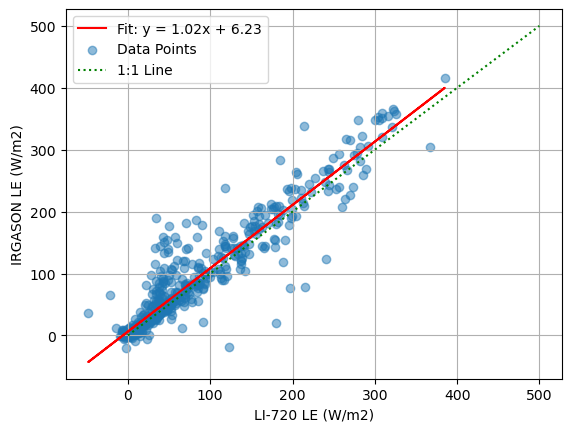

In [4]:



x = compare['LE_licor']
y = compare['LE_cs']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create regression line
y_pred = slope * x + intercept

# Plot
plt.plot(x, y_pred, color='red', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.scatter(x,y, label='Data Points', alpha=0.5)
plt.plot(np.arange(0,500,0.1),np.arange(0,500,0.1),color='g',linestyle=":",label='1:1 Line')
plt.grid(True)
plt.xlabel('LI-720 LE (W/m2)')
plt.ylabel('IRGASON LE (W/m2)')
plt.legend()

print(r_value**2)



RMSE: 25.114
Bias = -7.818, Spread = 23.901


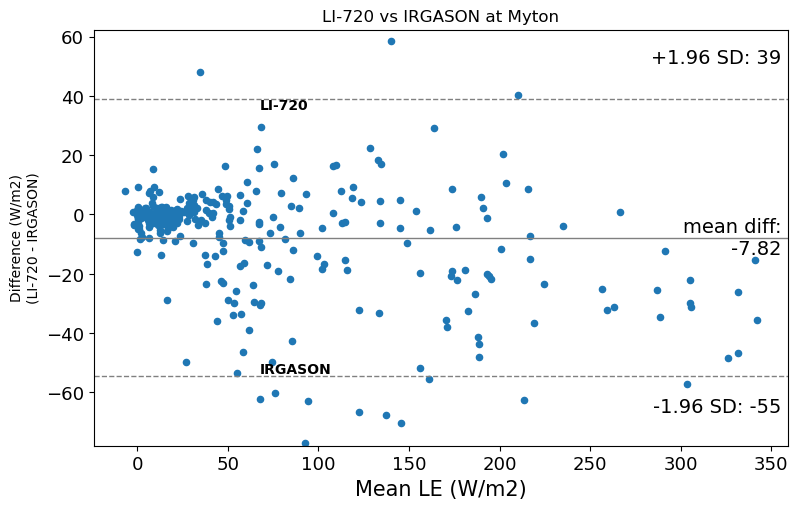

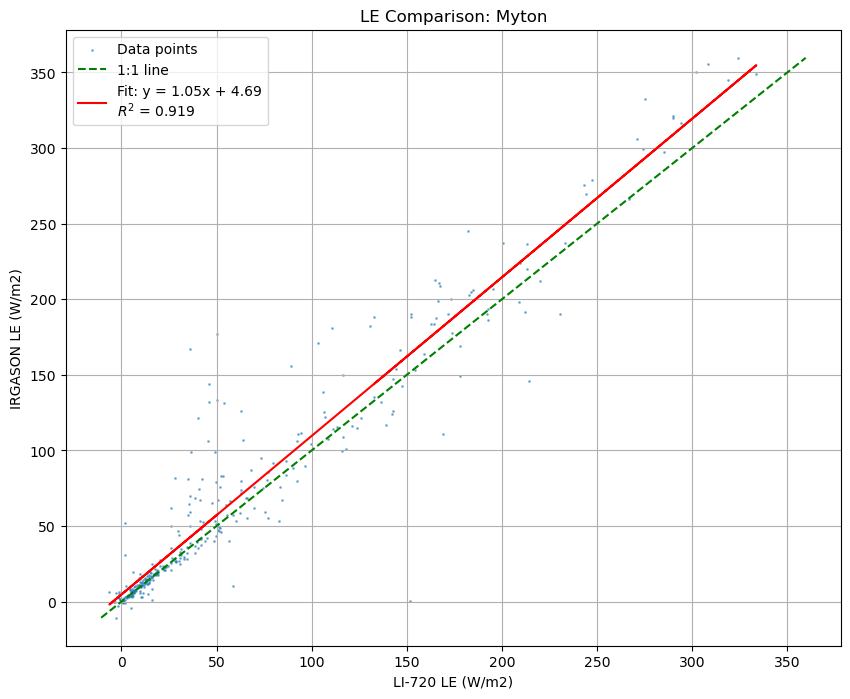

Slope: 1.049
Intercept: 4.691
R-squared: 0.919


(np.float64(1.04906332630795),
 np.float64(4.691086188758277),
 np.float64(0.9193650544439015),
 np.float64(2.5416877875551293e-186),
 np.float64(0.01692405418471156),
 <Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': 'LE Comparison: Myton'}, xlabel='LI-720 LE (W/m2)', ylabel='IRGASON LE (W/m2)'>)

In [7]:
compare_dict = {'LE_licor':['LI-720','LE','W/m2'],
                'LE_cs':['IRGASON','LE','W/m2'],}
bland_alt_plot(compare, compare_dict, 'Myton')
scatterplot_instrument_comparison(compare, compare_dict,'Myton')

RMSE: 21.584
Bias = 12.359, Spread = 17.722


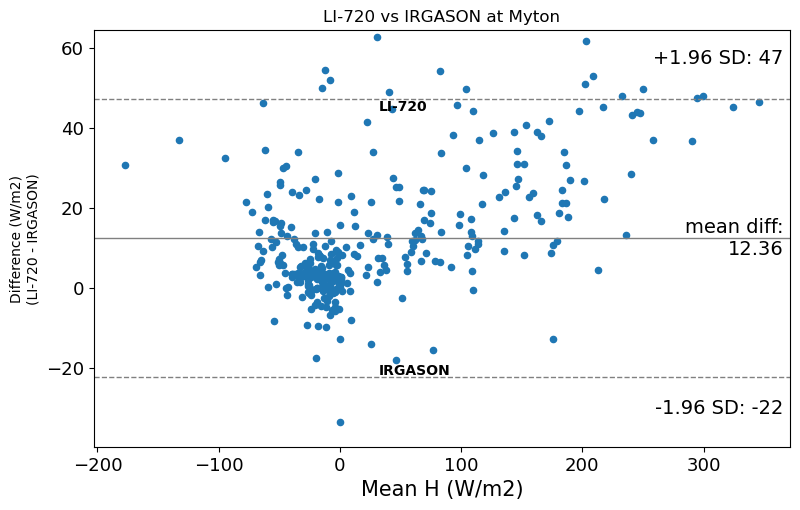

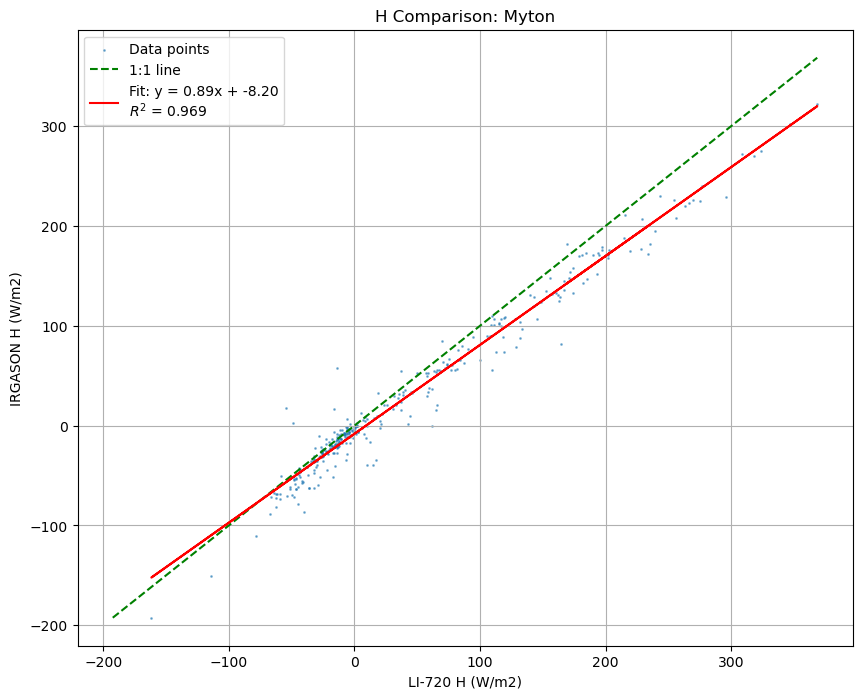

Slope: 0.891
Intercept: -8.203
R-squared: 0.969


(np.float64(0.890520236695797),
 np.float64(-8.202796236244488),
 np.float64(0.9691992655592306),
 np.float64(9.270355349356823e-257),
 np.float64(0.008647744317517634),
 <Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': 'H Comparison: Myton'}, xlabel='LI-720 H (W/m2)', ylabel='IRGASON H (W/m2)'>)

In [10]:
compare_dict = {'H_licor':['LI-720','H','W/m2'],
                'H_cs':['IRGASON','H','W/m2'],}
bland_alt_plot(compare, compare_dict, 'Myton')
scatterplot_instrument_comparison(compare, compare_dict,'Myton')

RMSE: 0.466
Bias = -0.355, Spread = 0.303


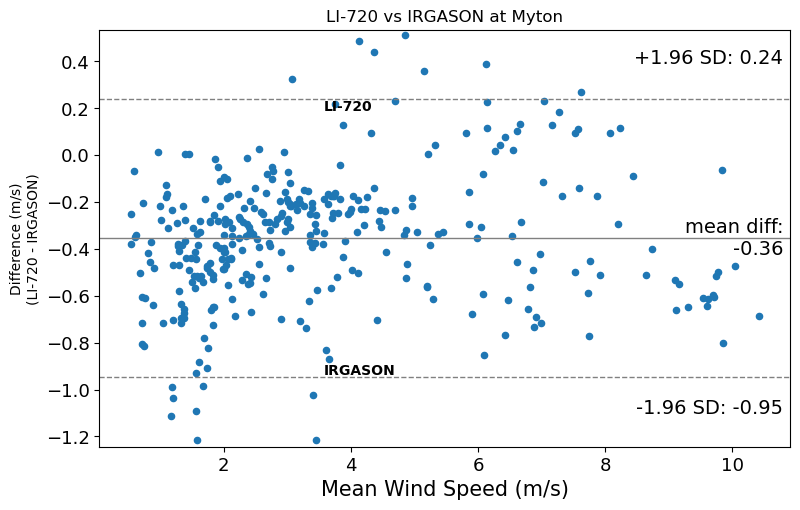

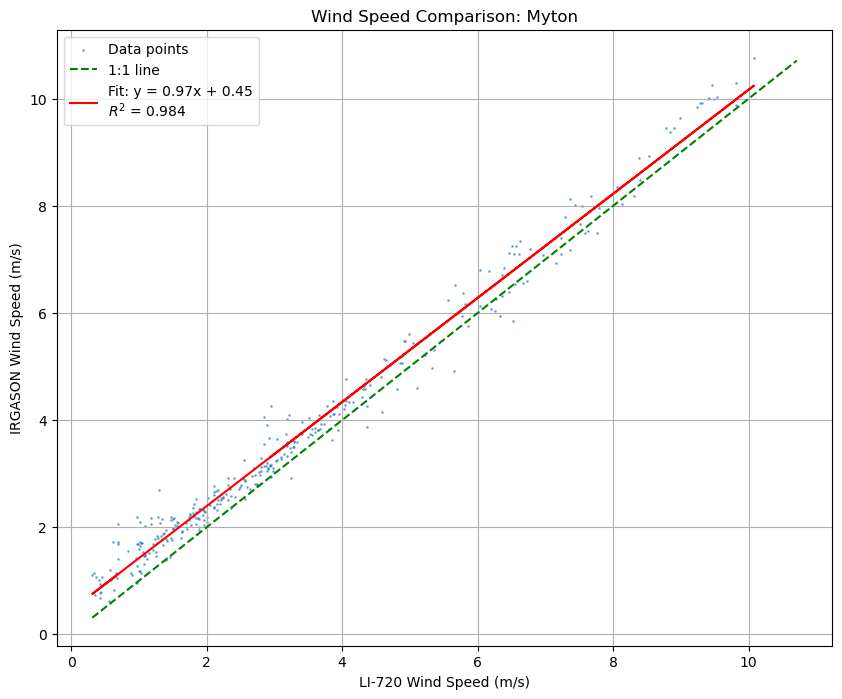

Slope: 0.972
Intercept: 0.452
R-squared: 0.984


(np.float64(0.9715167940838805),
 np.float64(0.4519019653145504),
 np.float64(0.983636794592978),
 np.float64(4.7663576642165536e-303),
 np.float64(0.0068257781698919835),
 <Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': 'Wind Speed Comparison: Myton'}, xlabel='LI-720 Wind Speed (m/s)', ylabel='IRGASON Wind Speed (m/s)'>)

In [13]:
compare_dict = {'WS_licor':['LI-720','Wind Speed','m/s'],
                'WS_cs':['IRGASON','Wind Speed','m/s'],}
bland_alt_plot(compare, compare_dict, 'Myton')
scatterplot_instrument_comparison(compare, compare_dict,'Myton')

RMSE: 0.040
Bias = -0.010, Spread = 0.039


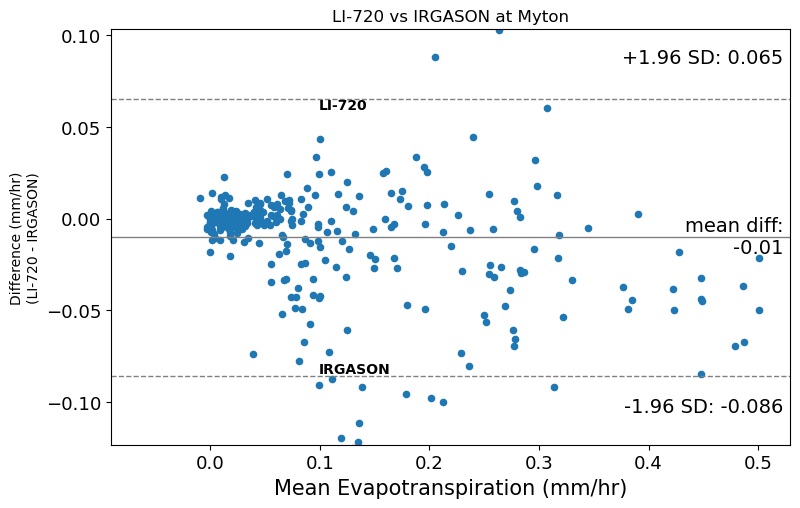

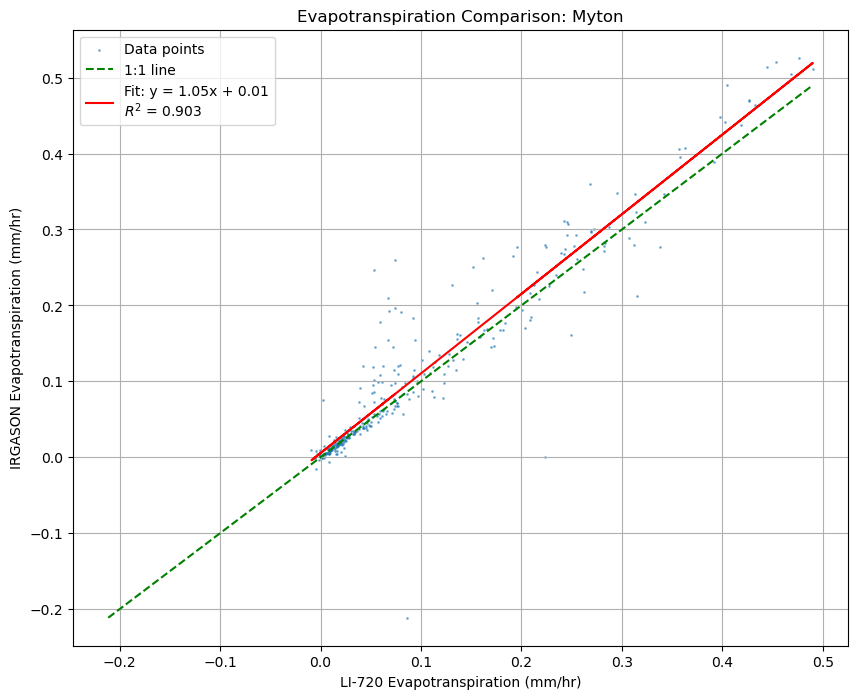

Slope: 1.049
Intercept: 0.006
R-squared: 0.903


(np.float64(1.0486481216715096),
 np.float64(0.0055488723776037085),
 np.float64(0.9033954877894034),
 np.float64(4.283423367278316e-173),
 np.float64(0.018679901433310647),
 <Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': 'Evapotranspiration Comparison: Myton'}, xlabel='LI-720 Evapotranspiration (mm/hr)', ylabel='IRGASON Evapotranspiration (mm/hr)'>)

In [17]:
compare['ET_licor_1'] = compare['ET_licor']*2
compare_dict = {'ET_licor_1':['LI-720','Evapotranspiration','mm/hr'],
                'ET_cs':['IRGASON','Evapotranspiration','mm/hr'],}
bland_alt_plot(compare, compare_dict, 'Myton')
scatterplot_instrument_comparison(compare, compare_dict,'Myton')

In [14]:
compare

,LE_cs,LE_licor,H_cs,H_licor,ET_cs,ET_licor,WD_cs,WS_cs,WD_licor,WS_licor
TIMESTAMP,,,,,,,,,,
2025-04-09 12:00:00,141.28450,73.002,192.1502,182.644,0.207076,0.054,140.76580,1.668944,95.9,1.06
2025-04-09 12:30:00,235.76780,193.030,171.9266,156.080,0.346101,0.142,270.12370,6.862736,198.9,4.83
2025-04-09 13:00:00,204.51060,174.128,153.1777,170.983,0.300425,0.128,273.00950,7.024494,212.3,6.59
2025-04-09 13:30:00,193.61380,158.691,162.1938,177.576,0.284583,0.117,279.32160,8.540269,217.9,7.98
2025-04-09 14:00:00,195.28810,151.795,206.4856,224.152,0.287129,0.111,287.55930,10.068510,225.7,9.45
...,...,...,...,...,...,...,...,...,...,...
2025-04-23 12:00:00,46.72833,29.489,188.5259,235.587,0.068503,0.022,73.07159,2.259942,20.1,1.99
2025-04-23 12:30:00,150.61530,43.388,176.0187,234.571,0.220960,0.032,70.30276,1.901796,16.2,1.15
2025-04-23 13:00:00,48.48936,24.175,132.2465,175.003,0.071166,0.018,67.95813,1.663618,18.6,1.34


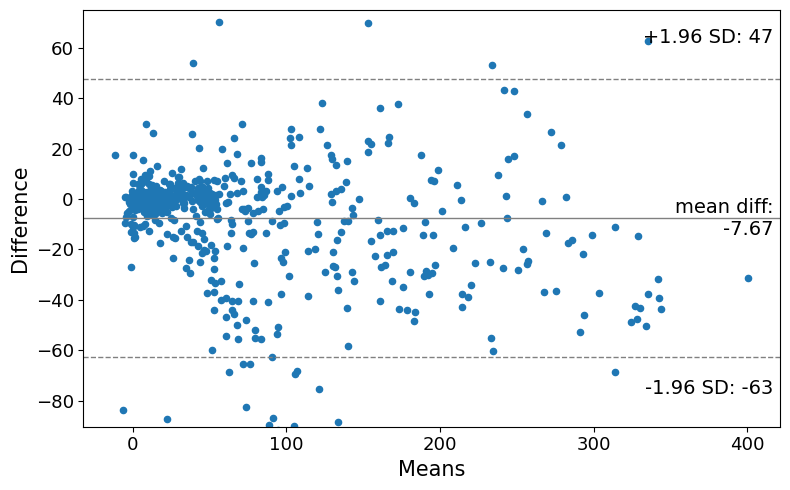

In [9]:


# Seed the random number generator.
# This ensures that the results below are reproducible.

f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(x, y, ax = ax)

plt.show()

On average, the LI-720 is 7.67 W/m2 higher than the IRGASON,


In [ ]:

compare['Residual'] = x - y
rmse = np.sqrt(mean_squared_error(x,y))
mean_diff = compare['Residual'].mean()

print(f"Mean Difference: {mean_diff:.3f}")
print(f"RMSE: {rmse:.3f}")

compare['Residual'].plot(title="Residuals (Sensor1 - Sensor2)", figsize=(10, 4))
plt.axhline(0, color='gray', linestyle='--')
plt.show()

In [ ]:


corr = correlate(x - x.mean(), y - y.mean(), mode='full')
lags = np.arange(-len(x) + 1, len(y))
plt.plot(lags, corr)
plt.title("Cross-Correlation")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.xlim(-20, 20)
plt.axvline(0, color='gray', linestyle='--')

In [ ]:
x = compare['H_licor']
y = compare['H_cs']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create regression line
y_pred = slope * x + intercept

# Plot
plt.plot(x, y_pred, color='red', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.scatter(x,y, label='Data Points', alpha=0.5)
plt.plot(np.arange(0,500,0.1),np.arange(0,500,0.1),color='g',linestyle=":",label='1:1 Line')
plt.grid(True)
plt.xlabel('LI-720 H (W/m2)')
plt.ylabel('IRGASON H (W/m2)')
plt.legend()

print(r_value**2)


In [ ]:
compare['Residual'] = x - y
rmse = np.sqrt(mean_squared_error(x,y))
mean_diff = compare['Residual'].mean()

print(f"Mean Difference: {mean_diff:.3f}")
print(f"RMSE: {rmse:.3f}")

compare['Residual'].plot(title="Residuals (Sensor1 - Sensor2)", figsize=(10, 4))
plt.axhline(0, color='gray', linestyle='--')
plt.show()

In [ ]:
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(x, y, ax = ax)

plt.show()
plt.xlabel("Mean of Sensors")
plt.ylabel("Difference (IRGASON - LI-720)")